<a href="https://colab.research.google.com/github/Fall28/Predicting-Student-Performance/blob/main/PredictingStudentAcademicSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [115]:
df = pd.read_csv('/content/Predict Student Dropout and Academic Success.csv', delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [117]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [118]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [119]:

X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [120]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


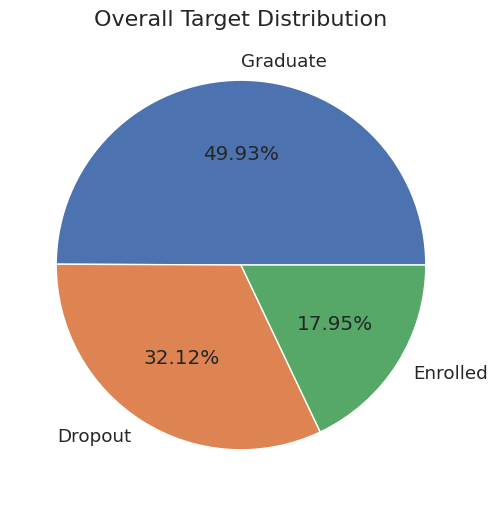

In [121]:
graduate_count = 2209
dropout_count = 1421
enrolled_count = 794

index_values = [graduate_count, dropout_count, enrolled_count]
index_labels = ['Graduate', 'Dropout', 'Enrolled']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Target Distribution', fontsize=16)

plt.show()

In [122]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.76
Confusion Matrix:
 [[244  23  49]
 [ 34  46  71]
 [  9  25 384]]
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.38       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



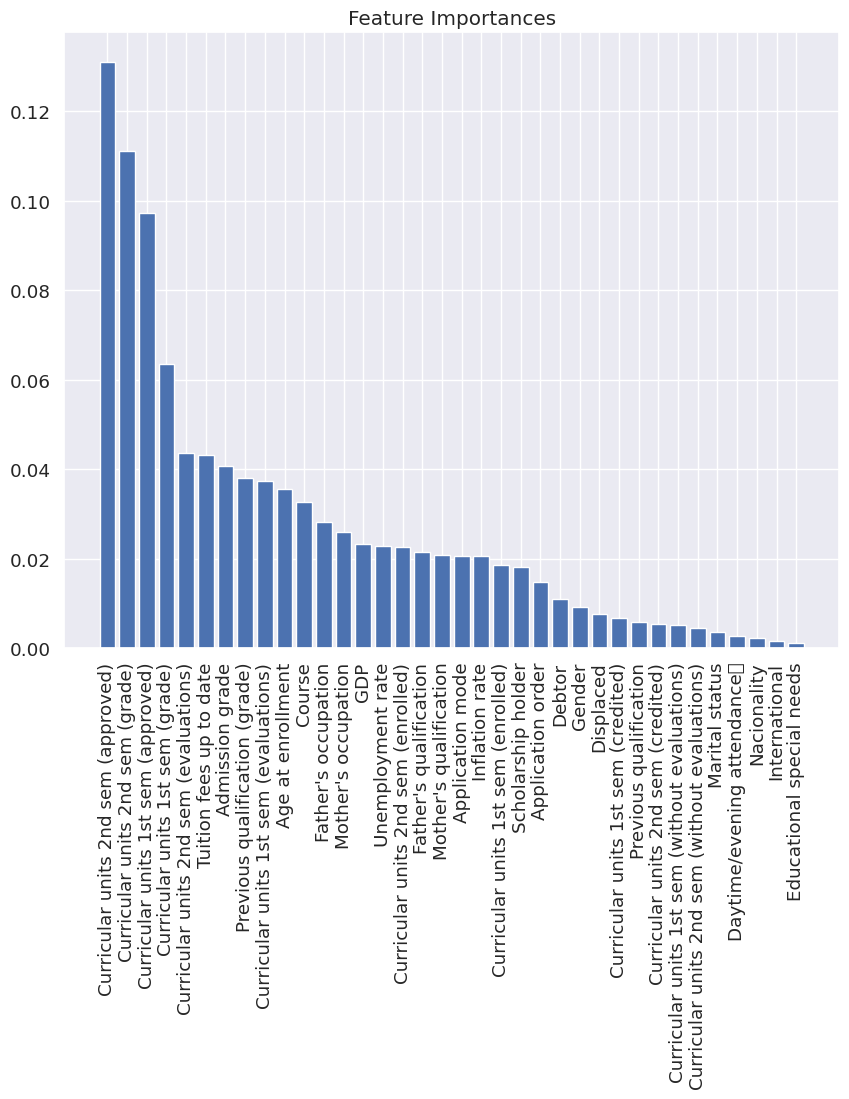

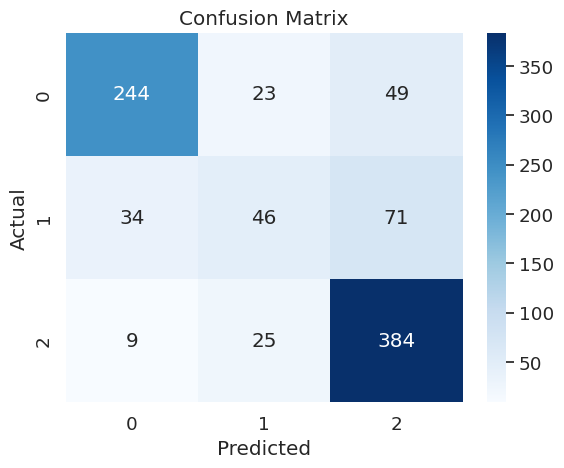

In [123]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Code from Parent paper:

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [125]:
data = pd.read_csv('Predict Student Dropout and Academic Success.csv', delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [126]:
sns.set(font_scale=1.2)

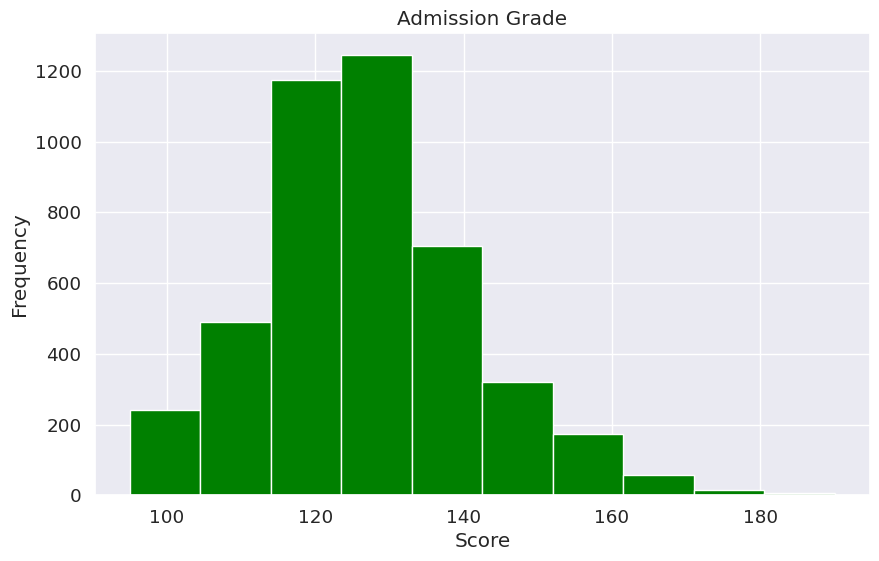

In [127]:
plt.figure(figsize=(10, 6))
plt.hist(data['Admission grade'], bins=10, color='green')
plt.title('Admission Grade')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

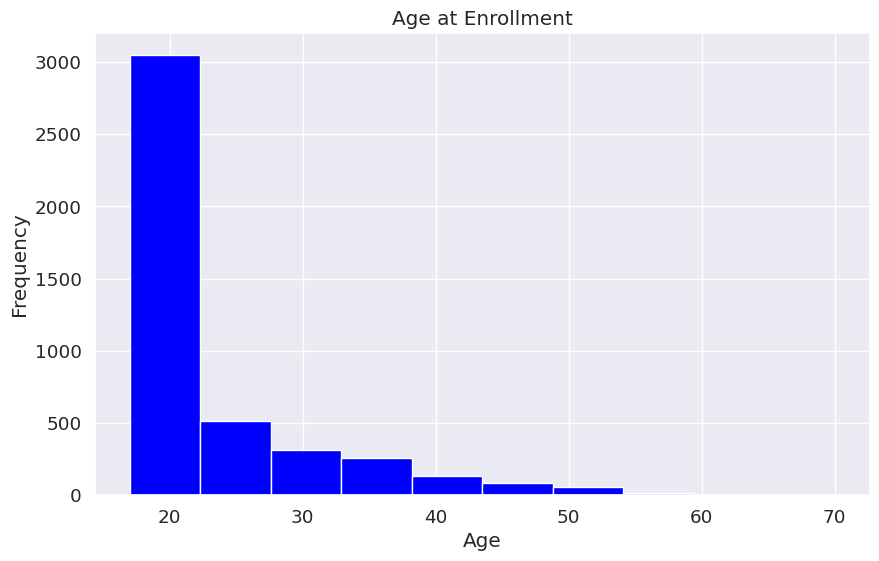

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age at enrollment'], bins=10, color='blue')
plt.title('Age at Enrollment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

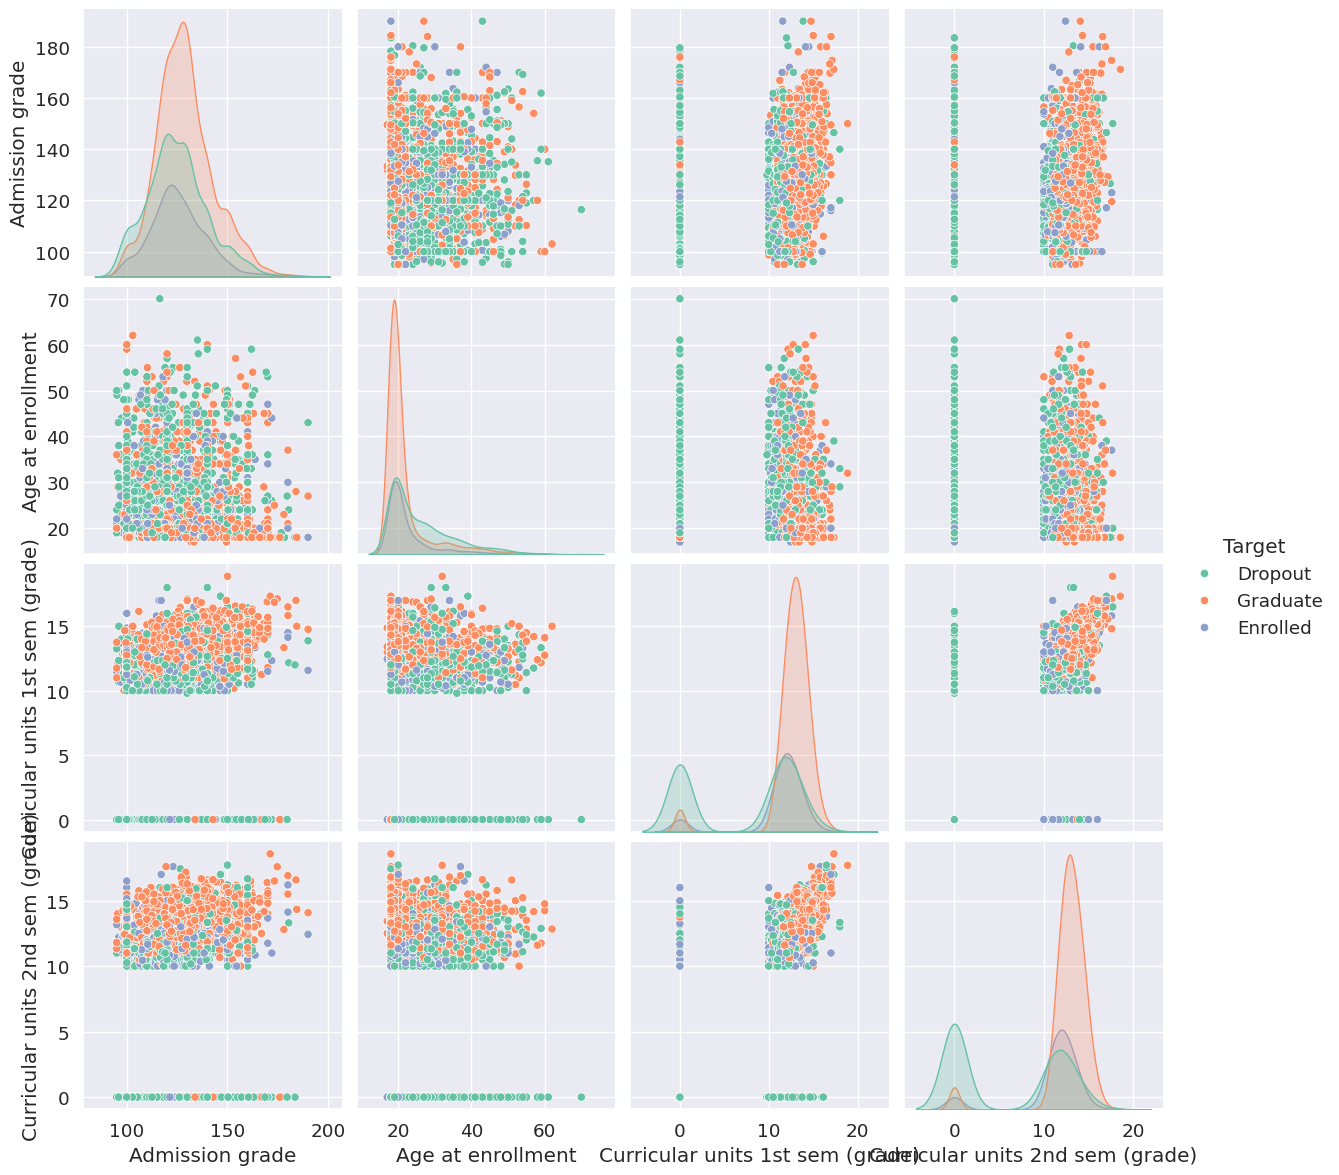

In [103]:
numeric_features = ['Admission grade', 'Age at enrollment',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
sns.pairplot(data, hue='Target', vars=numeric_features, palette='Set2', height=3)
plt.show()

In [104]:
df = data.copy()
X = df.drop(columns=['Target'])
y = df['Target']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, shuffle=False)

In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree - Training Accuracy:", dt_model.score(X_train, y_train))
print("Decision Tree - Testing Accuracy:", dt_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.6751412429378532
Confusion Matrix:
 [[248  62  60]
 [ 38  84  68]
 [ 54  63 385]]


In [107]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Training Accuracy:", rf_model.score(X_train, y_train))
print("Random Forest - Testing Accuracy:", rf_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.7532956685499058
Confusion Matrix:
 [[264  44  62]
 [ 37  71  82]
 [ 14  23 465]]


In [108]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression - Training Accuracy:", lr_model.score(X_train, y_train))
print("Logistic Regression - Testing Accuracy:", lr_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression - Training Accuracy: 0.7804878048780488
Logistic Regression - Testing Accuracy: 0.7495291902071564
Confusion Matrix:
 [[269  48  53]
 [ 43  64  83]
 [ 17  22 463]]


In [109]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVC - Training Accuracy:", svc_model.score(X_train, y_train))
print("SVC - Testing Accuracy:", svc_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVC - Training Accuracy: 0.8301606186793575
SVC - Testing Accuracy: 0.7401129943502824
Confusion Matrix:
 [[255  50  65]
 [ 32  65  93]
 [ 15  21 466]]


In [110]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=50)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classifier - Training Accuracy:", mlp_model.score(X_train, y_train))
print("MLP Classifier - Testing Accuracy:", mlp_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

MLP Classifier - Training Accuracy: 0.9229625223081499
MLP Classifier - Testing Accuracy: 0.7457627118644068
Confusion Matrix:
 [[287  39  44]
 [ 44  75  71]
 [ 28  44 430]]


In [111]:
rf_cvs = cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=10)
print("Random Forest - Cross-Validation Scores:", rf_cvs)
print("Mean Accuracy:", rf_cvs.mean())
print("Variance:", rf_cvs.std())

Random Forest - Cross-Validation Scores: [0.74777448 0.76854599 0.77083333 0.79761905 0.78869048 0.80357143
 0.77678571 0.76785714 0.75892857 0.82142857]
Mean Accuracy: 0.7802034760491733
Variance: 0.021243756266937433


Part 2

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [113]:
df = pd.read_csv("Predict Student Dropout and Academic Success.csv", delimiter=';', index_col=0)

In [129]:
ncol = len(df.columns)
nrow = len(df)
print(f"{nrow} x {ncol}")
print(df.dtypes)

4424 x 37
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gend

In [130]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        map_to_int = {name: n for n, name in enumerate(unique_vals)}
        df[col] = df[col].replace(map_to_int)

print("Data types after encoding:")
print(df.dtypes)

Data types after encoding:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                      

In [131]:
features = list(df.columns[:-1])
print("Features:", features)

Features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [132]:
X = df[features]
y = df['Target']

<Figure size 2000x2000 with 0 Axes>

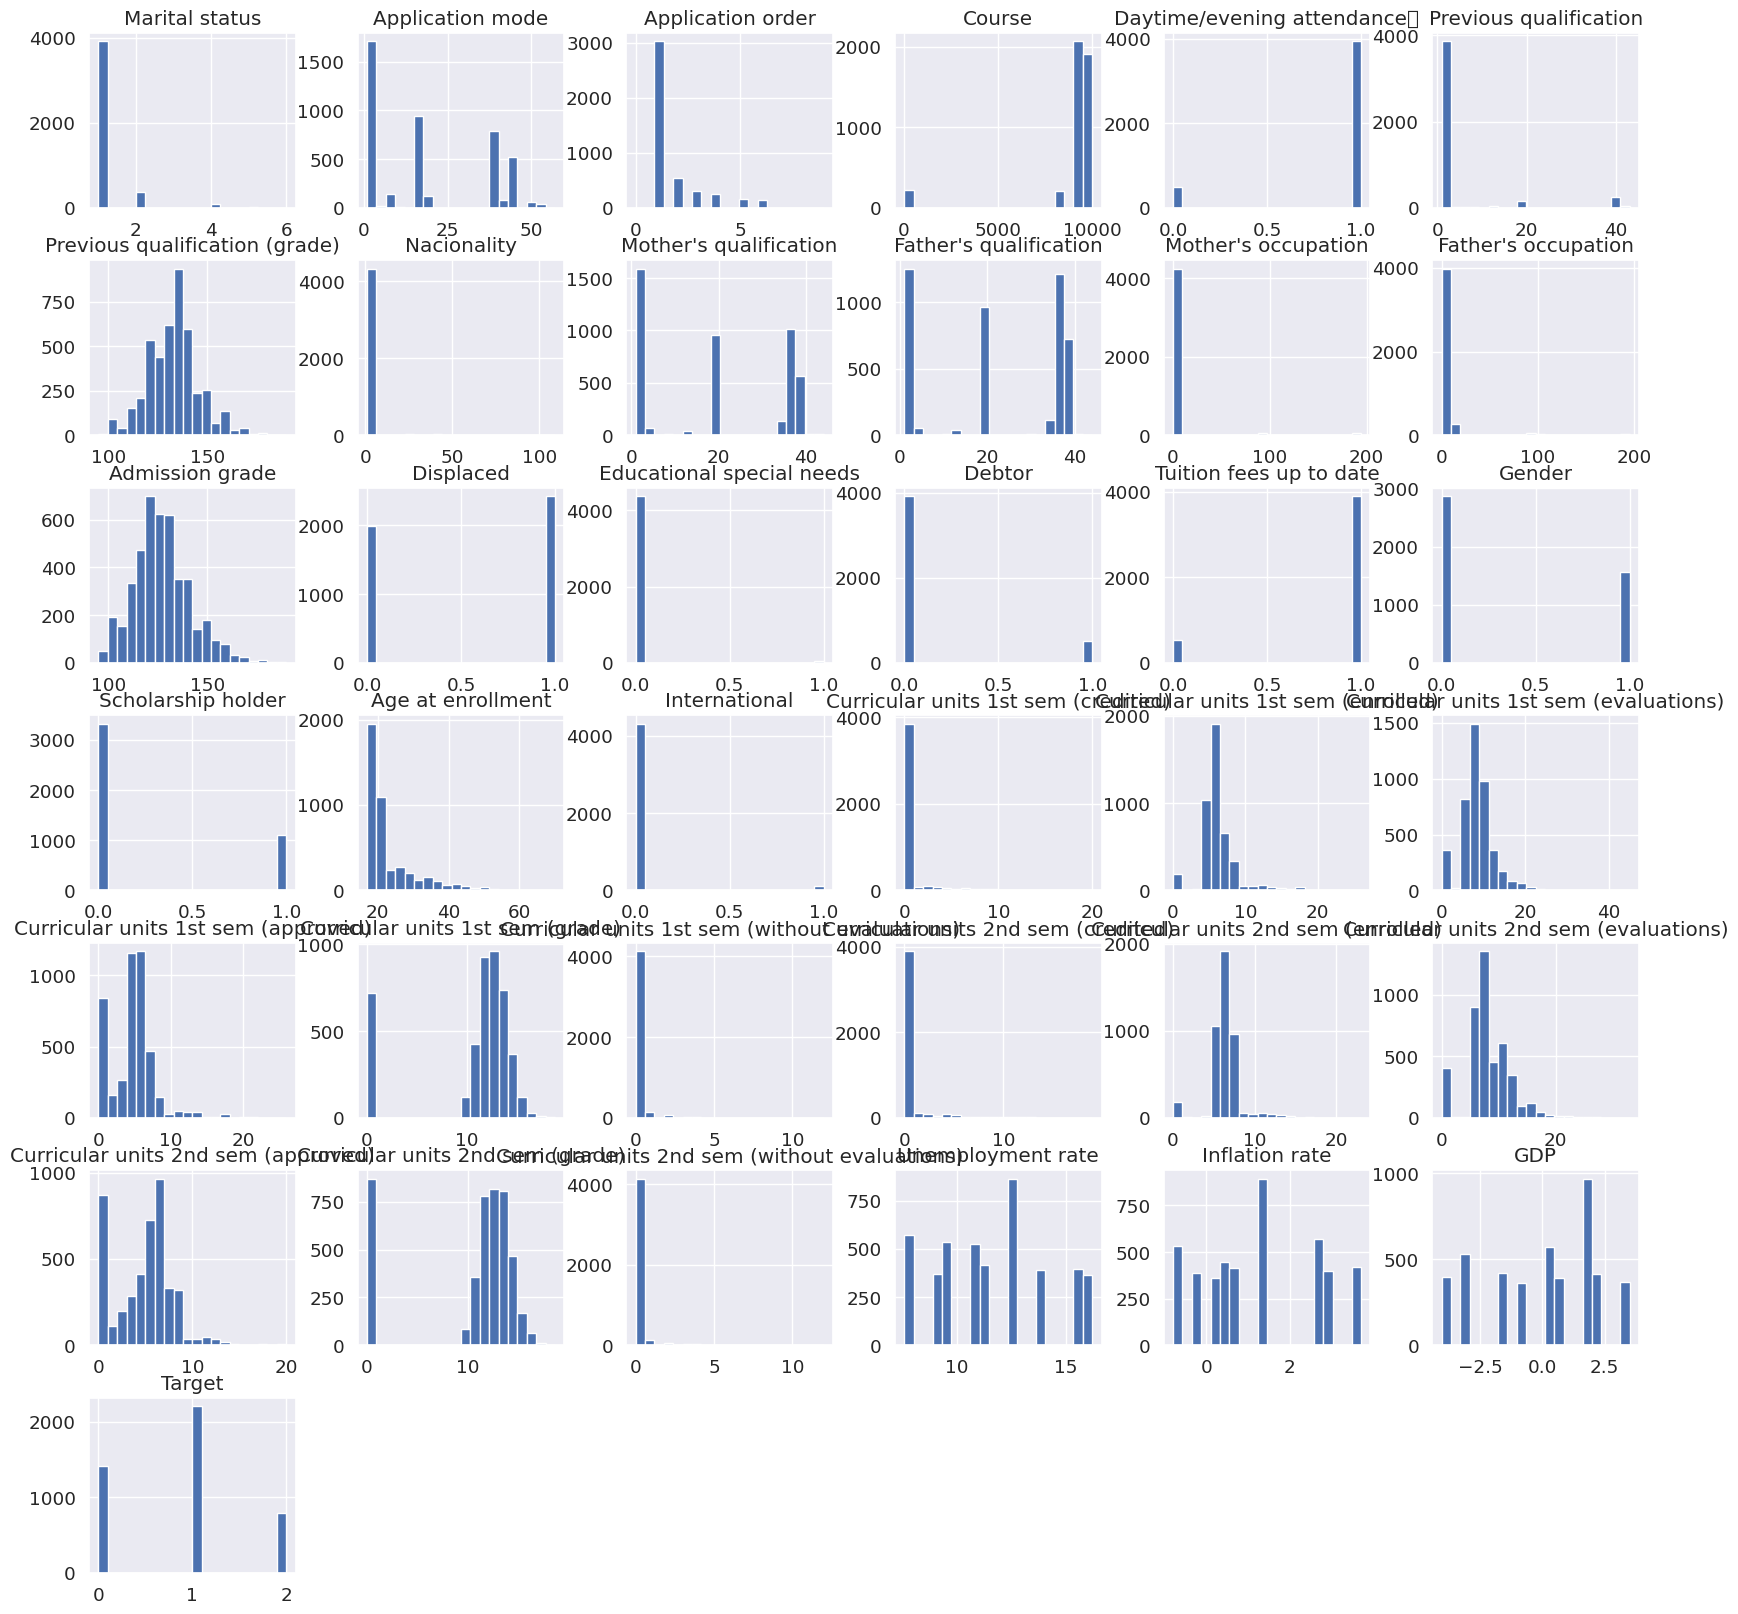

In [133]:
plt.figure(figsize=(20, 20))
df.hist(bins=20, figsize=(20, 20))
plt.show()

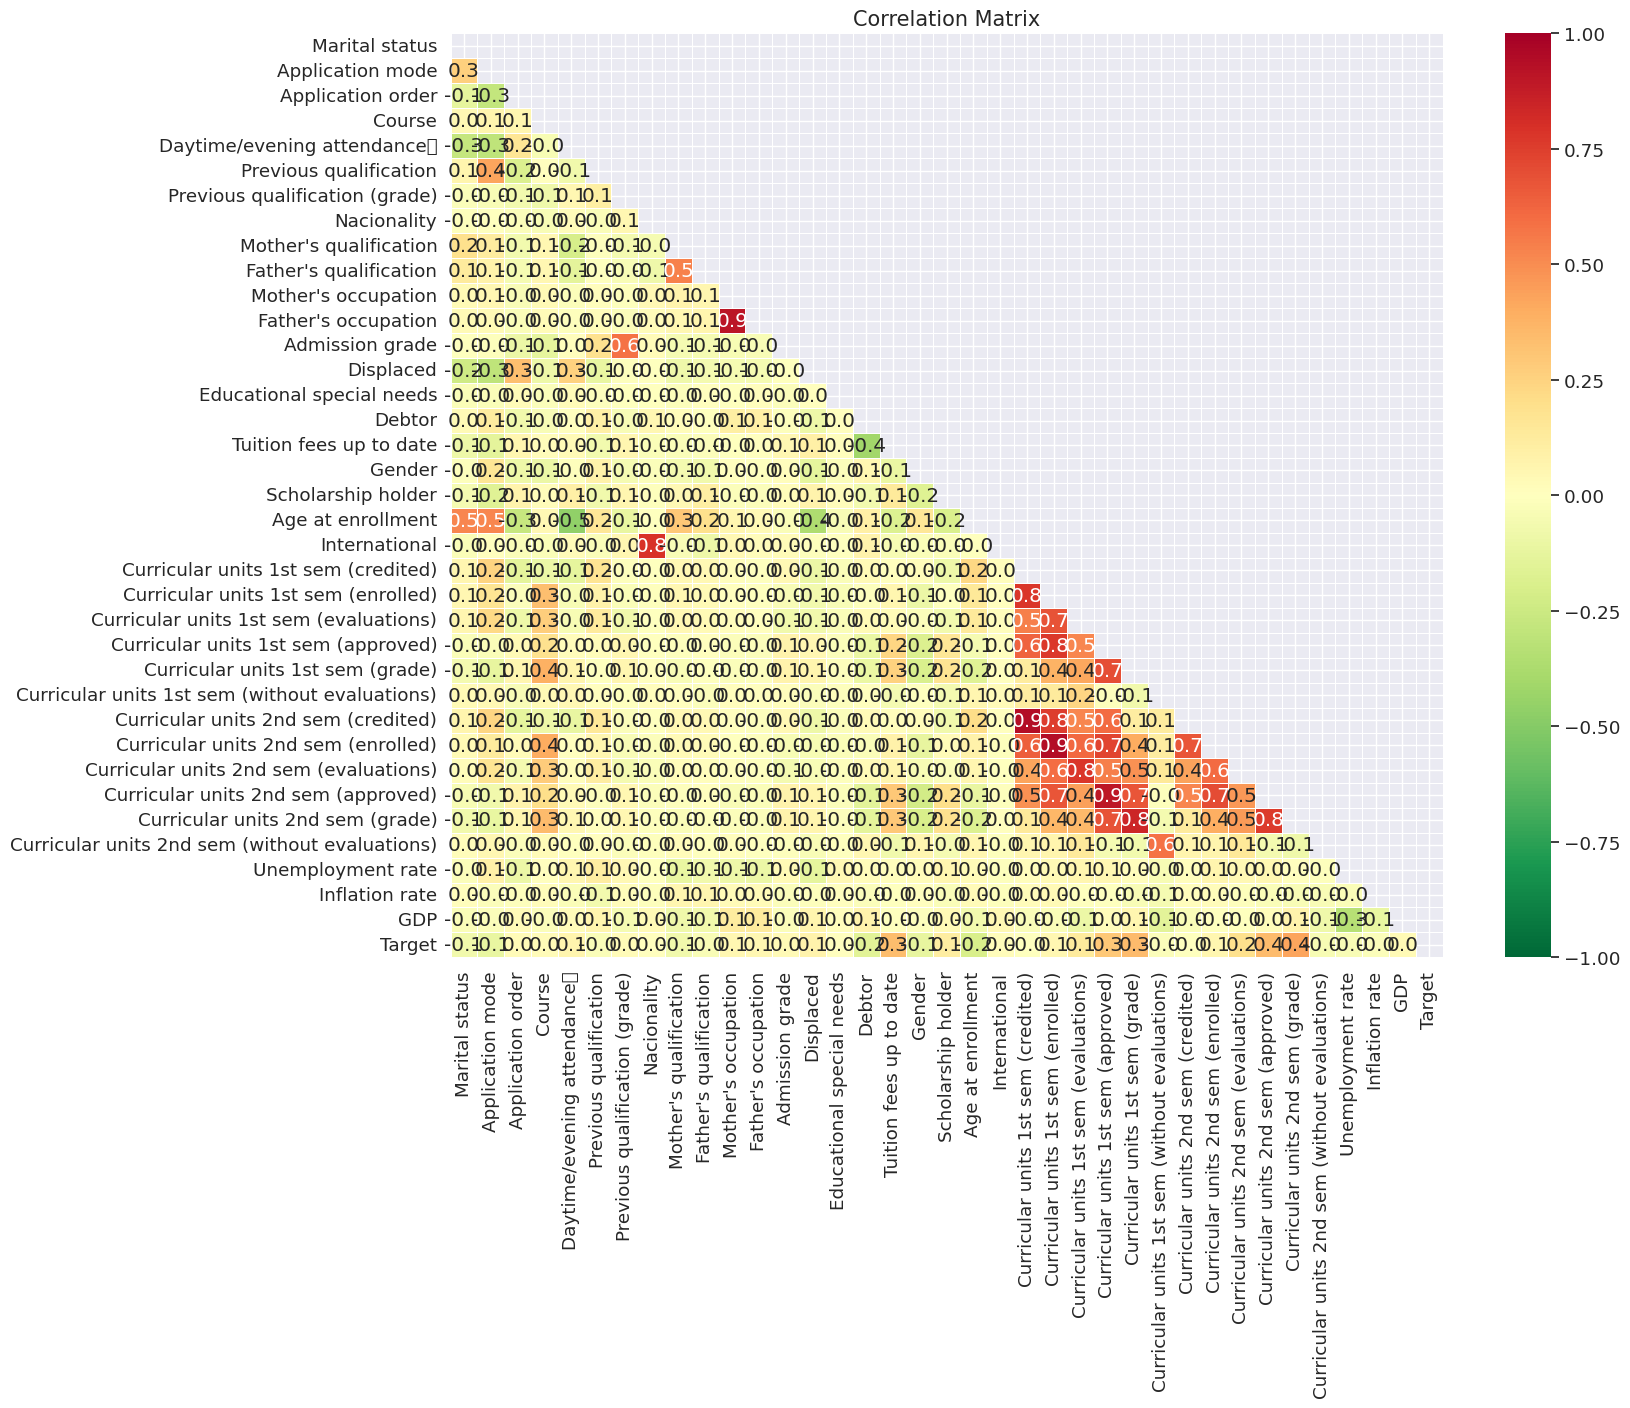

In [134]:
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, mask=mask, cmap='RdYlGn_r', vmax=1.0, vmin=-1, annot=True, linewidths=0.5, fmt='.1f')
plt.title("Correlation Matrix", size=15)
plt.show()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [136]:
clf = RandomForestClassifier(n_estimators=20)

In [137]:
param_dist = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [138]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, random_state=42)
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % (time() - start, n_iter_search))

RandomizedSearchCV took 10.90 seconds for 20 candidates parameter settings.


In [139]:
cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results[['mean_test_score', 'std_test_score', 'params']])

    mean_test_score  std_test_score  \
0          0.727716        0.005018   
1          0.728040        0.007880   
2          0.722547        0.005234   
3          0.779723        0.014667   
4          0.765506        0.009920   
5          0.727716        0.005418   
6          0.710595        0.006637   
7          0.729976        0.004644   
8          0.742249        0.011193   
9          0.765183        0.008270   
10         0.724483        0.002663   
11         0.769711        0.017768   
12         0.700259        0.006479   
13         0.773584        0.009750   
14         0.709295        0.014333   
15         0.769390        0.016583   
16         0.720606        0.009989   
17         0.654394        0.023254   
18         0.720930        0.013569   
19         0.768743        0.015387   

                                               params  
0   {'bootstrap': True, 'criterion': 'entropy', 'm...  
1   {'bootstrap': False, 'criterion': 'gini', 'max...  
2   {'bootst

In [140]:
best_params = random_search.best_params_
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=6,
                       min_samples_leaf=2, min_samples_split=6)

In [141]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
features_name = np.array(X.columns)


In [142]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features_name[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature Curricular units 2nd sem (approved) (0.15596457116434104)
2. feature Curricular units 2nd sem (grade) (0.11023737339306881)
3. feature Curricular units 1st sem (approved) (0.10352070916108304)
4. feature Curricular units 1st sem (grade) (0.06512022759554834)
5. feature Curricular units 2nd sem (evaluations) (0.04532597434407508)
6. feature Tuition fees up to date (0.04256784468592571)
7. feature Admission grade (0.03931666507420066)
8. feature Course (0.03837277788096751)
9. feature Curricular units 1st sem (evaluations) (0.037875128340246055)
10. feature Age at enrollment (0.03497454853973218)
11. feature Previous qualification (grade) (0.03405705111877749)
12. feature Father's occupation (0.024808303277767715)
13. feature Curricular units 2nd sem (enrolled) (0.024221603245282716)
14. feature GDP (0.02363768947035948)
15. feature Mother's occupation (0.022978051319909255)
16. feature Unemployment rate (0.021117495124151973)
17. feature Inflation rate (0.019

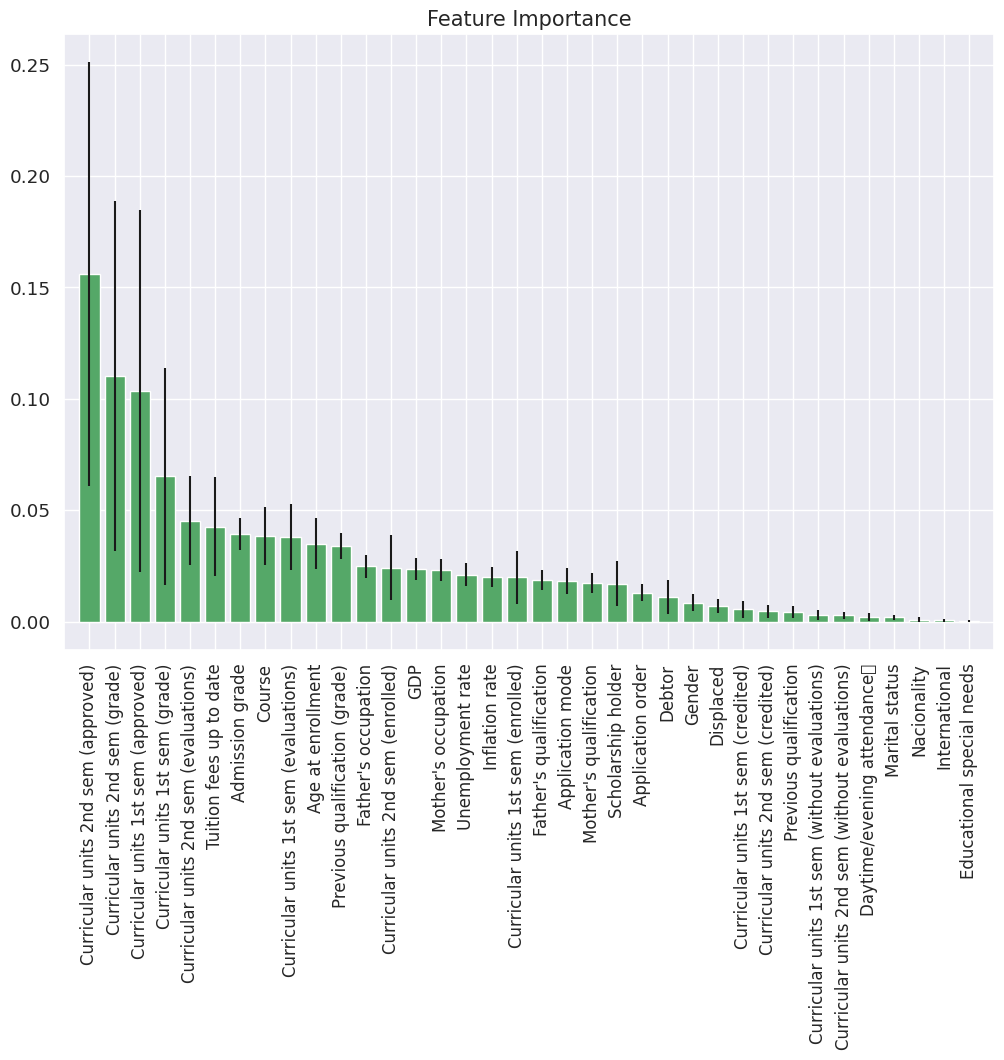

In [144]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", size=15)
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], color='g', align="center")
plt.xticks(range(X.shape[1]), features_name[indices], rotation=90, fontsize=12)
plt.xlim([-1, X.shape[1]])
plt.show()

*Novelty Implementation*


In [143]:
# here i will reload the dataset to perform my own feature engineering on it.

In [146]:
# the datasets for the parent paper and our dataset are different, so we must reupload it here and perform the appropriate feature engineering and models in order
# to create a machine learning pipeline which gives us the best results.
# what we do differently than the paper is give a particular focus to the variables in the dataset and their importance in prediciting student academic success.
# the main step we take is dropping all fields of 'enrolled' as target, as the variables have low correlation to predicting who is actually already enrolled and our
# model performs worst on this.

In [147]:
df2 = pd.read_csv("Predict Student Dropout and Academic Success.csv", delimiter=';', index_col=0)

In [151]:
# create new cumulative performance metrics based on their correlation
df2['Total_units_approved'] = (
    df2['Curricular units 1st sem (approved)'] +
    df2['Curricular units 2nd sem (approved)']
)

df2['Total_units_grade'] = (
    df2['Curricular units 1st sem (grade)'] +
    df2['Curricular units 2nd sem (grade)']
)

In [152]:
# create ratios
df2['Approval_rate'] = df2['Total_units_approved'] / (
    df2['Curricular units 1st sem (enrolled)'] +
    df2['Curricular units 2nd sem (enrolled)'].replace(0, 1)
)

In [153]:
# create interaction terms
df2['Grade_Age_Interaction'] = df2['Admission grade'] * df2['Age at enrollment']

In [154]:
df2 = df2[df2['Target']!='Enrolled']

In [158]:
X = df2.drop("Target", axis=1)
y = df2["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# models and parameters for tuning
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# perform grid search for each model
best_models_filtered = {}
for model_name, mp in model_params.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models_filtered[model_name] = grid_search.best_estimator_

# evaluate models on the test data
model_performance = {}
for name, model in best_models_filtered.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))
    model_performance[name] = accuracy

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.87       277
    Graduate       0.90      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87       277
    Graduate       0.91      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726

SVM Classification Report:
              precision    recall  f1-score   support

     Dropout       0.94      0.79      0.86       277
    Graduate       0.88      0.97      0.92       449

    accuracy                           0.90       726
   macro avg       0.91

In [160]:
# stacking classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('rf', best_models_filtered['Random Forest']),
        ('gb', best_models_filtered['Gradient Boosting']),
        ('svm', best_models_filtered['SVM'])
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stacking, target_names=['Dropout', 'Graduate']))

# add stacking classifier performance to results
model_performance['Stacking Classifier'] = stacking_accuracy

# display all model performances
for model, acc in model_performance.items():
    print(f"{model} Accuracy: {acc:.4f}")

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

     Dropout       0.92      0.85      0.88       277
    Graduate       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

Random Forest Accuracy: 0.9008
Gradient Boosting Accuracy: 0.9036
SVM Accuracy: 0.9008
Stacking Classifier Accuracy: 0.9146
